In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ast
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split
import re

In [2]:
sns.set()

In [3]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('./drive/MyDrive/prozhito/datasets/bio_ann_final.tsv', sep='\t')
df = df.drop('Unnamed: 0', axis=1)
df.columns = ['tokens', 'BIO_str']
df.head(3)

,tokens,BIO_str
0,У меня большая симпатия к Лукьянину — человек ...,O O O O O O O O O O O O O O O O O O O O O
1,"Потому , что не было уверенности , что все чит...",O O O O O O O O O O O O O O O O O O O O O O O ...
2,"> Каким приговором , указом каким > Ты здесь ,...",O O O O O O O O O O O O O O O O O


Map tags into numbers

In [5]:
with open("/content/drive/MyDrive/prozhito/tags_dict.txt", "r") as f:
    contents = f.read()
    tags_dict = ast.literal_eval(contents)

with open("/content/drive/MyDrive/prozhito/BIO_dict.txt", "r") as f: 
    contents = f.read()
    BIO_dict = ast.literal_eval(contents)

BIO_dict_domain = {value : key for (key, value) in tags_dict.items()}

In [6]:
BIO_dict_domain

{'CHAR': 'Характеристика',
 'FAC': 'Учреждение',
 'LOC': 'Место',
 'O': 'O',
 'ORG': 'Организация',
 'PER': 'Персона'}

In [7]:
df['BIO_str'] = df['BIO_str'].apply(lambda x: re.sub('.-MISC', 'O', x))
df.drop_duplicates('tokens').shape == df.shape
df['BIO_nums'] = df.BIO_str.apply(lambda x: [BIO_dict.get(i) for i in x.split()])
df['BIO_list'] = df.BIO_str.apply(lambda x:x.split())
df.head(3)

,tokens,BIO_str,BIO_nums,BIO_list
0,У меня большая симпатия к Лукьянину — человек ...,O O O O O O O O O O O O O O O O O O O O O,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"Потому , что не было уверенности , что все чит...",O O O O O O O O O O O O O O O O O O O O O O O ...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,"> Каким приговором , указом каким > Ты здесь ,...",O O O O O O O O O O O O O O O O O,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


Look at the tags' frequencies

In [8]:
all_bio = []
for l in df.BIO_list:
    all_bio.extend(l)
    
bio_counter = Counter(all_bio)

In [9]:
pd.DataFrame({'tag': sorted(list(bio_counter.keys())),
              'number of occurence in corpus': [bio_counter[i] for i in sorted(list(bio_counter.keys()))]})

,tag,number of occurence in corpus
0,B-CHAR,306
1,B-FAC,11
2,B-LOC,102
3,B-ORG,19
4,B-PER,527
5,I-CHAR,10
6,I-FAC,1
7,I-LOC,7
8,I-ORG,10
9,I-PER,242


In [10]:
label_list = ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-FAC', 'I-FAC', 'B-PER', 'I-PER', 'B-CHAR', 'I-CHAR', 'O']
len(label_list)

11

In [11]:
def dict_col(d, dc):
  x = []
  y = []
  cols = []
  for key in d.keys():
    cols.append(dc.get(key.split('-')[-1]))
    x.append(key)
    y.append(d[key])
  return x, y, cols

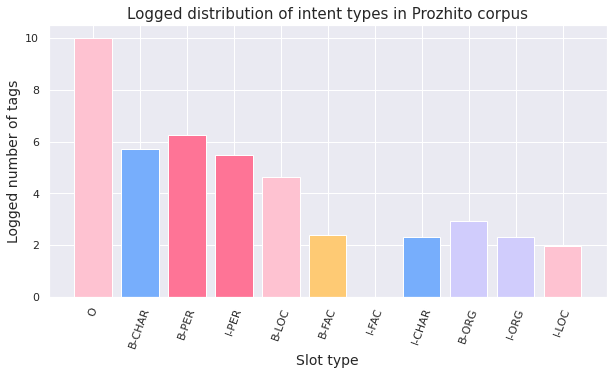

In [12]:
colors = {'O': '#FEC2D1', 'LOC': '#FEC2D1', 'FAC':  '#FECA74', 'PER' : '#FE7496', 'CHAR': '#77AEFC', 'ORG': '#D0CCFC'}
x, y, cols = dict_col(bio_counter, colors)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=70)
plt.bar(x,
        np.log(list(y)),
       color=cols)
plt.xlabel('Slot type', size=14)
plt.ylabel('Logged number of tags', size=14)
plt.title('Logged distribution of intent types in Prozhito corpus', size=15)
plt.show()

In [13]:
bio_domains = {}
for key in bio_counter.keys():
  dk = key.split('-')[-1]
  if dk in bio_domains:
    bio_domains[dk] += bio_counter[key]
  else: 
    bio_domains[dk] = bio_counter[key]  

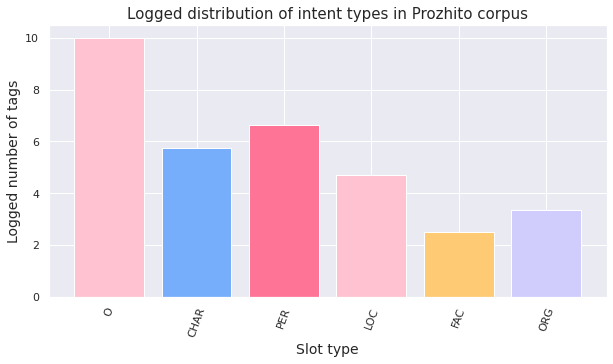

In [14]:
x, y, cols = dict_col(bio_domains, colors)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=70)
plt.bar(x,
        np.log(list(y)),
       color=cols)
plt.xlabel('Slot type', size=14)
plt.ylabel('Logged number of tags', size=14)
plt.title('Logged distribution of intent types in Prozhito corpus', size=15)
plt.show()

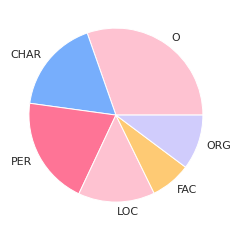

In [15]:
plt.pie(np.log(list(y)), labels = x, colors=cols)
plt.show()

In [16]:
bio_domains

{'CHAR': 316, 'FAC': 12, 'LOC': 109, 'O': 22119, 'ORG': 29, 'PER': 769}

In [17]:
pd.DataFrame({'tag': sorted(list(bio_domains.keys())),
              'number of occurence in corpus': [bio_domains[i] for i in sorted(list(bio_domains.keys()))]})

,tag,number of occurence in corpus
0,CHAR,316
1,FAC,12
2,LOC,109
3,O,22119
4,ORG,29
5,PER,769


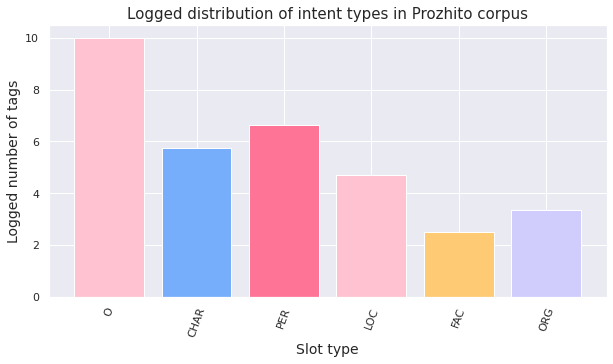

In [18]:
# del bio_domains['O']
x, y, cols = dict_col(bio_domains, colors)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=70)
plt.bar(x,
        np.log(list(y)),
       color=cols)
plt.xlabel('Slot type', size=14)
plt.ylabel('Logged number of tags', size=14)
plt.title('Logged distribution of intent types in Prozhito corpus', size=15)
plt.show()

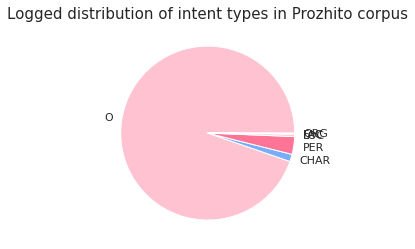

In [19]:
plt.pie(list(y), labels = x, colors=cols)
plt.title('Logged distribution of intent types in Prozhito corpus', size=15)
plt.show()

# Train-test-val split

In [20]:
df = df[['tokens', 'BIO_nums']]
df.columns = ['tokens', 'labels']
df.head()

,tokens,labels
0,У меня большая симпатия к Лукьянину — человек ...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
1,"Потому , что не было уверенности , что все чит...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
2,"> Каким приговором , указом каким > Ты здесь ,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
3,"Подумал , что летом ребята куда затащили .","[10, 10, 10, 10, 8, 10, 10, 10]"
4,Нашел потрясающие материалы о В . М . Брадисе ...,"[10, 10, 10, 10, 6, 7, 7, 7, 7, 10, 10, 8, 8, ..."


In [21]:
dict_tags = {}
for i, labels in enumerate(df['labels']):
  unique_tags = set(labels)
  for ut in unique_tags:
    if ut not in dict_tags:
      dict_tags[ut] = [i]
    else:
      dict_tags[ut].append(i)

In [22]:
bio_counter_reversed = {value: key for key, value in bio_counter.items()}
BIO_dict_reversed = {value: key for key, value in BIO_dict.items()}

In [23]:
train = set()
for key, value in sorted(bio_counter_reversed.items()):
  if key > 4:
    ut = BIO_dict[bio_counter_reversed[key]]
    train, test_val = train_test_split(dict_tags[ut], test_size = 0.25, random_state = 10)
    train = set(train)
    test_val = set(test_val)
  else:
    ut = BIO_dict[bio_counter_reversed[key]]
    to_add = dict_tags[ut]
    train = train.union(to_add)

In [24]:
train.intersection(test_val)

set()

In [25]:
train = df.iloc[list(train)]
train.to_csv('train_df_new.csv', encoding='utf-8')
train.head(3)

,tokens,labels
0,У меня большая симпатия к Лукьянину — человек ...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
2,"> Каким приговором , указом каким > Ты здесь ,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
3,"Подумал , что летом ребята куда затащили .","[10, 10, 10, 10, 8, 10, 10, 10]"


In [26]:
test_val_df = df.iloc[list(test_val)]

In [28]:
dict_tags = {}
for i, labels in enumerate(test_val_df['labels']):
  unique_tags = set(labels)
  for ut in unique_tags:
    if ut not in dict_tags:
      dict_tags[ut] = [i]
    else:
      dict_tags[ut].append(i)

In [29]:
for key, value in sorted(bio_counter_reversed.items()):
  if BIO_dict[value] in dict_tags.keys():
    if key > 4:
      ut = BIO_dict[bio_counter_reversed[key]]
      test, val = train_test_split(dict_tags[ut], test_size = 0.35, random_state = 10)
      test = set(test)
      val = set(val)
    else:
      ut = BIO_dict[bio_counter_reversed[key]]
      to_add = dict_tags[ut]
      test = test.union(to_add)

In [30]:
val = df.iloc[list(val)]
val.to_csv('val_df_new.csv', encoding='utf-8')
test = df.iloc[list(test)]
test.to_csv('test_df_new.csv', encoding='utf-8')

In [31]:
val.head(3)

,tokens,labels
1,"Потому , что не было уверенности , что все чит...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
6,Уж то ростовское дело куда ярче !..,"[10, 10, 10, 10, 10, 10, 10]"
7,17 апреля был необычный день .,"[10, 10, 10, 10, 10, 10]"


In [32]:
test.head(3)

,tokens,labels
0,У меня большая симпатия к Лукьянину — человек ...,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
2,"> Каким приговором , указом каким > Ты здесь ,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
3,"Подумал , что летом ребята куда затащили .","[10, 10, 10, 10, 8, 10, 10, 10]"
